In [151]:
import numpy as np
import gluoncv
from matplotlib import pyplot as plt
import cv2

In [152]:
train_root = "/home/jg/MILA/COMP767-Reinforcement_Learning/COMP767/project/data/VOCtrainval_06-Nov-2007/VOCdevkit"
eval_root = "/home/jg/MILA/COMP767-Reinforcement_Learning/COMP767/project/data/VOCdevkit"

train_dataset = gluoncv.data.VOCDetection(root = train_root, splits=[(2007, 'trainval')])
val_dataset = gluoncv.data.VOCDetection(root = eval_root, splits=[(2007, 'test')])
print('Num of training images:', len(train_dataset))
print('Num of validation images:', len(val_dataset))

Num of training images: 5011
Num of validation images: 4952


In [153]:
detected_class=14 #aeroplane
detected_class_name = train_dataset.classes[detected_class]
print(detected_class_name)
set_name = "trainval"
fname = f"{train_root}/VOC2007/ImageSets/Main/{detected_class_name}_{set_name}.txt"
with open(fname) as f:
    content = f.readlines()

content_index = [int(x.strip().split()[0]) for x in content]
content_detected_class = [int(x.strip().split()[0]) for x in content if int(x.strip().split()[1]) ==1] 
content_detected_class_filtered=[]
i = 0
for class_img_index in content_detected_class:
    while i < len(content_index):
        if content_index[i] == class_img_index:
            content_detected_class_filtered.append(i)
            break
        i+=1
print(content_detected_class)
print(content_detected_class_filtered)

person
[9, 17, 21, 23, 30, 32, 35, 41, 48, 50, 66, 73, 81, 83, 89, 101, 104, 110, 113, 125, 129, 133, 138, 146, 150, 159, 162, 163, 164, 165, 169, 170, 171, 173, 174, 177, 192, 193, 194, 200, 210, 218, 220, 222, 229, 232, 245, 251, 257, 259, 269, 275, 276, 278, 282, 285, 288, 298, 302, 305, 308, 320, 321, 322, 323, 328, 331, 337, 338, 352, 359, 367, 372, 374, 382, 394, 407, 411, 419, 428, 433, 435, 438, 443, 446, 448, 463, 468, 470, 476, 477, 480, 482, 483, 498, 499, 500, 516, 518, 520, 523, 524, 525, 526, 530, 531, 535, 545, 554, 555, 579, 589, 591, 597, 612, 613, 625, 626, 633, 654, 677, 684, 688, 690, 694, 695, 702, 709, 717, 726, 731, 733, 739, 742, 750, 752, 753, 760, 770, 777, 782, 793, 797, 799, 802, 805, 806, 810, 812, 814, 816, 828, 829, 834, 843, 847, 848, 851, 854, 859, 860, 865, 874, 878, 879, 885, 892, 895, 898, 902, 903, 904, 906, 911, 915, 918, 920, 926, 943, 948, 949, 967, 971, 987, 991, 996, 999, 1001, 1011, 1014, 1017, 1024, 1028, 1036, 1042, 1050, 1057, 1060, 1061, 1

In [164]:
train_image, train_label = train_dataset[2]
print('Image size (height, width, RGB):', train_image.shape)

Image size (height, width, RGB): (375, 500, 3)


In [165]:
bounding_boxes = train_label[:, :4]
print('Num of objects:', bounding_boxes.shape[0])
print('Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):\n',  bounding_boxes)

Num of objects: 4
Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):
 [[ 68. 171. 269. 329.]
 [149. 140. 228. 283.]
 [284. 200. 326. 330.]
 [257. 197. 296. 328.]]


In [166]:
class_ids = train_label[:, 4]
print('Class IDs (num_boxes, ):\n', class_ids)

Class IDs (num_boxes, ):
 [12. 14. 14. 14.]


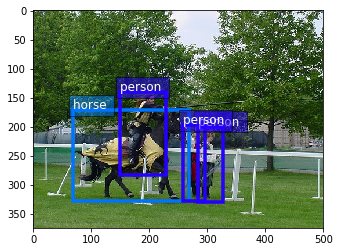

In [167]:
gluoncv.utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes, 
                            scores=None,labels=class_ids, class_names=train_dataset.classes)
plt.show()

In [168]:
class BoundingBox:
    def __init__(self, x1, y1, x2, y2):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2

    def area(self):
        return (self.x2-self.x1) * (self.y2-self.y1)

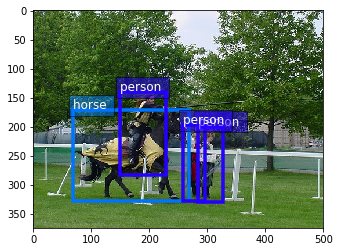

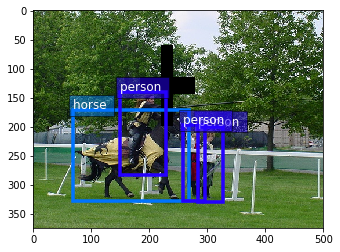

In [169]:
bb = BoundingBox(184, 61, 278, 198)
def add_ior(img, bb, f=5):
    w = bb.x2 - bb.x1
    h = bb.y2 - bb.y1
    delta_x = int(w*(1-1/f)/2)
    delta_y = int(h*(1-1/f)/2)
    cv2.rectangle(img,(bb.x1 + delta_x,bb.y1),(bb.x2 - delta_x,bb.y2),(0,0,0),-1)
    cv2.rectangle(img,(bb.x1,bb.y1 + delta_y),(bb.x2,bb.y2 - delta_y),(0,0,0),-1)
    
img = train_image.asnumpy()
gluoncv.utils.viz.plot_bbox(img, bounding_boxes, scores=None,labels=class_ids, class_names=train_dataset.classes)

add_ior(img, bb)
gluoncv.utils.viz.plot_bbox(img, bounding_boxes, scores=None, labels=class_ids, class_names=train_dataset.classes)
plt.show()